### Importing Modules (p514)

In [1]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Brief Review of Machine Learning (p515)

### Regression (p516)

In [2]:
# generate data with 50 features out of which only 10 
# feature are informative
X_all, y_all = datasets.make_regression(
    n_samples=50,
    n_features=50,
    n_informative=10
)

In [3]:
# split the dataset into two equal size
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X_all, y_all, train_size=0.5)

In [4]:
# create a LinearRegression instance to peform a regression
model = linear_model.LinearRegression()

In [5]:
# invoke the fit method to fit the model to the data
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# evaluate the model for a given set of features
def sse(resid):
    return np.sum(resid**2)
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

1.5188854086870197e-24

In [7]:
# overfitted model is at suitable for predicting unseen data
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

143364.67571376264

In [8]:
# compute R-squared score for training dataset
print(model.score(X_train, y_train))

# compute R-squared score for testing dataset
print(model.score(X_test, y_test))

1.0
0.6791543622919924


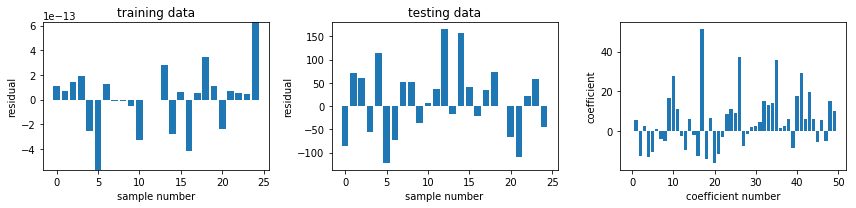

In [9]:
# plot the residuals of the training and testing datasets and
# inspect the values of the coefficients and the residuals
def plot_residuals_and_coeff(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("sample number")
    axes[0].set_ylabel("residual")
    axes[0].set_title("training data")
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("sample number")
    axes[1].set_ylabel("residual")
    axes[1].set_title("testing data")
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("coefficient number")
    axes[2].set_ylabel("coefficient")
    fig.tight_layout()
    
    return fig, axes

fig, ax = plot_residuals_and_coeff(
    resid_train, 
    resid_test, 
    model.coef_
)

In [10]:
# perform Ridge regression to fit a gregression problem in a way
# that avoid overfitting as much as possible
model = linear_model.Ridge(alpha=2.5)

In [11]:
# fit the regression model to the data
model.fit(X_train, y_train)

Ridge(alpha=2.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [12]:
# compute the model predictions for the training dataset
# and compute the corresponding SSE
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

1507.1946875360898

In [13]:
# compute the model predictions for the testing dataset
# and compute the corresponding SSE
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

136822.84066619896

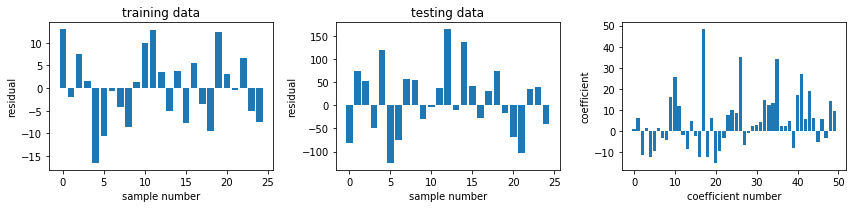

In [14]:
# plot the training/testing residuals and the model parameters
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

In [15]:
# perform L1-regularized LASSO regression
model = linear_model.Lasso(alpha=1.0)
model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [16]:
# compute the model predictions for the training dataset
# and compute the corresponding SSE
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

568.1095865089359

In [17]:
# compute the model predictions for the testing dataset
# and compute the corresponding SSE
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

38063.03638281318

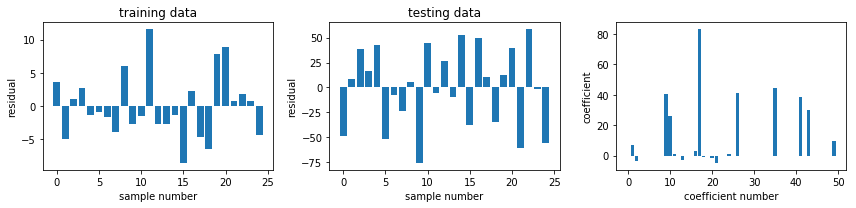

In [18]:
# plot the training/testing residuals and the model parameters
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

In [19]:
# create a range of a values that span several orders of magnitude
alphas = np.logspace(-4, 2, 100)
coeffs = np.zeros((len(alphas), X_train.shape[1]))
sse_train = np.zeros_like(alphas)
sse_test = np.zeros_like(alphas)

In [20]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
# loop through the a values and perform the LASSO regression
for n, alpha in enumerate(alphas):
    model = linear_model.Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    coeffs[n, :] = model.coef_
    sse_train[n] = sse(y_train - model.predict(X_train))
    sse_test[n] = sse(y_test - model.predict(X_test))

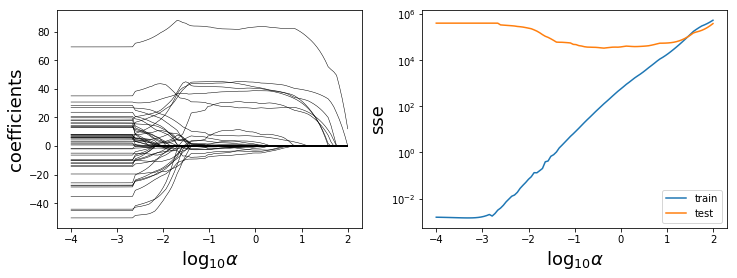

In [22]:
# plot the coefficients and the SSE for the training and testing datasets
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
for n in range(coeffs.shape[1]):
    axes[0].plot(np.log10(alphas), coeffs[:, n], color='k', lw=0.5)

axes[1].semilogy(np.log10(alphas), sse_train, label="train")
axes[1].semilogy(np.log10(alphas), sse_test, label="test")
axes[1].legend(loc=0)

axes[0].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[0].set_ylabel(r"coefficients", fontsize=18)
axes[1].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[1].set_ylabel(r"sse", fontsize=18);

In [23]:
# carry out the process of testing a regularized regression
# with several values of a
model = linear_model.LassoCV()
model.fit(X_all, y_all)

LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [24]:
# access the value of regularization strength parameter a
# selected through the cross-validation search
model.alpha_

0.10533187764348698

In [25]:
# compute the model predictions for the training dataset
# and compute the corresponding SSE
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

4.169309682393362

In [26]:
# compute the model predictions for the testing dataset
# and compute the corresponding SSE
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

2.794982343551525

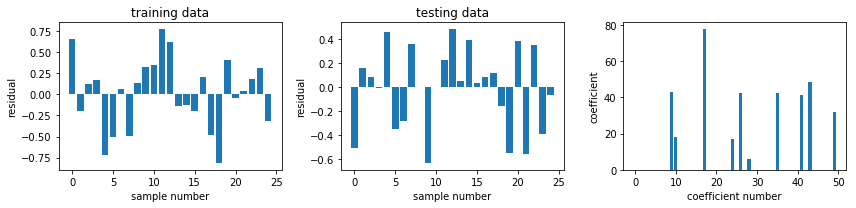

In [27]:
# plot the training/testing residuals and the model parameters
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

In [28]:
# perform an elastic-net regression with cross-validation
model = linear_model.ElasticNetCV()
model.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [29]:
# access the value of regularization parameters a and b
model.alpha_, model.l1_ratio

(0.22287177693499824, 0.5)

In [30]:
# compute the model predictions for the training dataset
# and compute the corresponding SSE
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

2024.8907165078758

In [31]:
# compute the model predictions for the testing dataset
# and compute the corresponding SSE
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

128099.59482670714

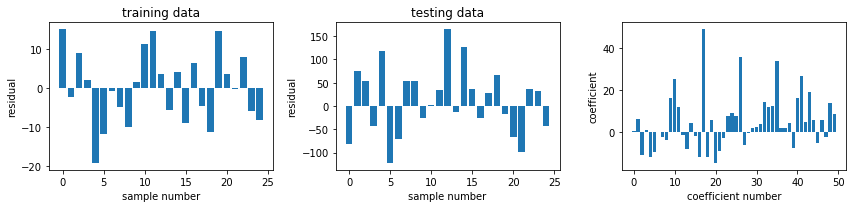

In [32]:
# plot the training/testing residuals and the model parameters
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

### Classification (p529)

### Clustering (p535)